<a href="https://colab.research.google.com/github/TaoFeng1234/Tao_Portfolio/blob/master/DecisionTreePruning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

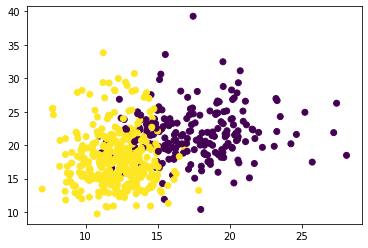

In [ ]:
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
X, y = load_breast_cancer(return_X_y=True)
X = X[:, :2]
feature_cols = ['radius','texture']
plt.clf()
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [ ]:
#Part a 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
mod = DecisionTreeClassifier()
p = mod.fit(X_train,y_train)
    
y_predicted_train = p.predict(X_train)
print("Accuracy for training data is:", accuracy_score(y_train,y_predicted_train ))

y_predicted_test = p.predict(X_test)
print("Accuracy for testing data is:", accuracy_score(y_test, y_predicted_test))

Accuracy for training data is: 1.0
Accuracy for testing data is: 0.8181818181818182


In [ ]:
#Part b reference to https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html
path = mod.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.2735847531721366


In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

In [ ]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

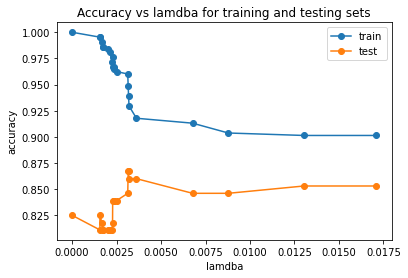

In [ ]:
fig, ax = plt.subplots()
ax.set_xlabel("lamdba")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs lamdba for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train")
ax.plot(ccp_alphas, test_scores, marker='o', label="test")
ax.legend()
plt.show()

In [ ]:
import numpy as np 
best_lambda = ccp_alphas[np.argmax(test_scores)]
best_test_accuracy = test_scores[np.argmax(test_scores)]

print("The best test accuracy could achieve is:",best_test_accuracy)
print("Best Lamdba is:",best_lambda)

The best test accuracy could achieve is: 0.8671328671328671
Best Lamdba is: 0.003154826394263014


In [ ]:
#Part c
def plot_regions (tree):
  #plot_colors = ['y ', 'p']
  plot_step = 0.02
  breast_cancer = load_breast_cancer()
  X = breast_cancer.data
  y = breast_cancer.target
  plt.clf()
  idx = np.arange(X.shape[0])
  np.random.shuffle( idx )
  X = X[idx]
  y = y[idx]
  x_min ,x_max = X [:, 0].min() - 1, X [:, 0].max() + 1
  y_min ,y_max = X [:, 1].min() - 1, X [:, 1].max() + 1
  xx , yy = np.meshgrid(np.arange(x_min, x_max, plot_step ),
                        np . arange ( y_min , y_max , plot_step ))
  Z = tree . predict ( np . c_ [ xx . ravel () , yy . ravel ()])
  Z = Z . reshape ( xx . shape )
  cs = plt.contourf(xx , yy , Z , cmap = plt . cm . Paired )
  plt.xlabel( breast_cancer . feature_names [0])
  plt.ylabel( breast_cancer . feature_names [1])
  plt.axis("tight")
  for i in range(2):
    idx = np . where ( y == i )
    plt.scatter( X [ idx , 0] , X [ idx , 1],
                   label = breast_cancer.target_names [ i ], 
                   cmap = plt.cm.Paired)

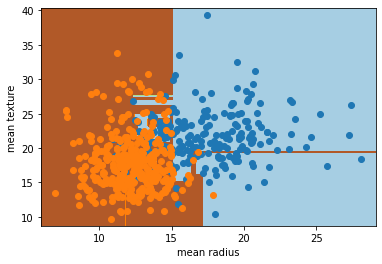

In [ ]:
plot_regions(p)
plt.show()

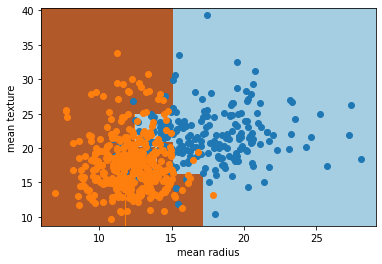

In [ ]:
 plot_regions(clfs[np.argmax(test_scores)])